# Import Package

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pickle
sys.path.append(os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WCRG'))
from Wavelet_Packets import *


# Import an Image

im_shape = torch.Size([1, 512, 512])


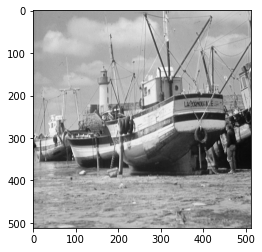

In [ ]:
im = torch.load('/content/drive/MyDrive/Colab Notebooks/WCRG/Notebooks Examples/boat.pt')
print('im_shape = ' +str(im.shape))
plt.imshow(im[0],cmap='Greys')
plt.show()

# Define a Wavelet

In [ ]:
W = DefineWavelet('Db',m=4,device='cpu',mode='Periodic')

# WaveletTransform

**1st method**

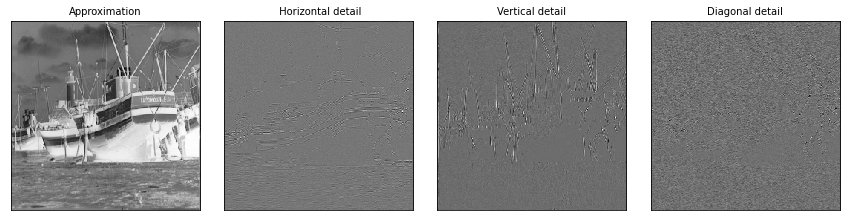

In [ ]:
#Wavelet Transform
cAA, cAD, cDA, cDD= W.Wav_2d(im)
#Inverse Transform
im_reco = W.Inv_2d(cAA, cAD, cDA, cDD)
#Plot wavelet Transform
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cAA[0], cAD[0], cDA[0], cDD[0]]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

**2nd method**

wavelet transform shape = torch.Size([1, 512, 512])


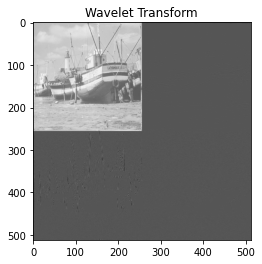

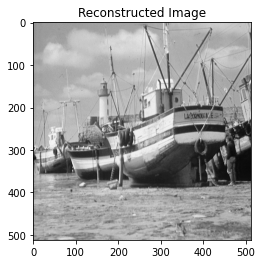

In [ ]:
#Wavelet Transform With Square Format
im_wav = W.Wav_2d_sqformat(im)
print('wavelet transform shape = ' +str(im_wav.shape))
#Inverse Transform With Square Format
im_reco = W.Inv_2d_sqformat(im_wav)

#plot wavelet Transform
plt.title('Wavelet Transform')
plt.imshow(im_wav[0],cmap='Greys')
plt.show()
plt.title('Reconstructed Image')
plt.imshow(im_reco[0],cmap='Greys')
plt.show()

In [ ]:
#Check That the reconstructed image is indeed the original image
print('Reconstruction error = '+str((torch.norm(im-im_reco)/torch.norm(im)*100).numpy())+'%')

Reconstruction error = 1.1358665e-05%


# Wavelet Packets

## How to define a Tree

A Tree describes how to cascade wavelet filters. At step one, we wavelet transform the image, creating for panels, with low frequencies, and horizontal, vertical, and diagonal frequencies. Each of theses panels is given a name, in order 0,1,2,3. Adding a Node to 2 for instance, says we will redecompose the subpanel 2 of vertical frequencies, into 4 new subpanels, 20,21,22,23 with the same frequency ordering. We may add a node to the new low frequency panel name 20, and do it again, then creating 200,201,202,203, and so on

Calling Tree() create a tree of decomposition into 4 panels, thus equivalent to the fast wavelet transform
We may visualize this tree. Low frequencies are at the upper left, high frequencies at the bottom right

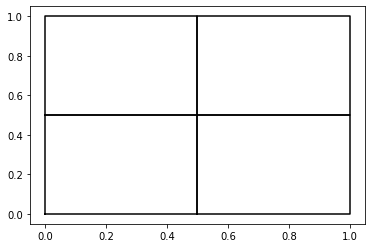

In [ ]:
#Create Tree
tree = Tree()
#Drawing Tree
tree.draw()


In order to create a more complicated Tree, we recursively add nodes

In [ ]:
im_inv = W.Packet_2d(im, tree)

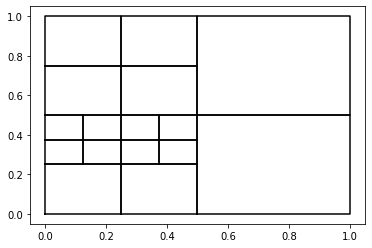

In [ ]:
tree = Tree()

#Second Decomposition Level
tree.addNode('02')
tree.addNode('00')
#Third Decomposition Level
tree.addNode('021')
tree.addNode('020')
#Draw the Tree
tree.draw()


## Wavelet Packet Transform 

We use our tree in order to decompose our image. The frequencies are divided as shown before, and we find the associated wavelet transform map where we expect to find the frequency in the precedent plot.

wavelet transform shape = torch.Size([1, 512, 512])


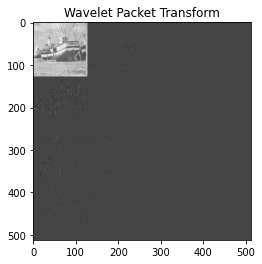

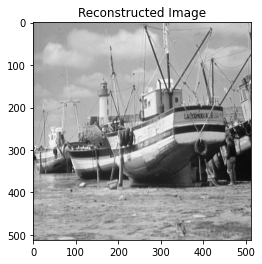

In [ ]:
#Wavelet Packet Transform 
im_wav = W.Packet_2d(im, tree)
print('wavelet transform shape = ' +str(im_wav.shape))
#Inverse Wavelet Packet Transform
im_reco = W.Inv_Packet_2d(im_wav,tree)

#plot wavelet Transform
plt.title('Wavelet Packet Transform')
plt.imshow(im_wav[0],cmap='Greys')
plt.show()
plt.title('Reconstructed Image')
plt.imshow(im_reco[0],cmap='Greys')
plt.show()

In [ ]:
#Check That the reconstructed image is indeed the original image
print('Reconstruction error = '+str((torch.norm(im-im_reco)/torch.norm(im)*100).numpy())+'%')

Reconstruction error = 1.8644792e-05%


## Predifined Tree

Some particular trees are already implemented and easy to load

depth = 1


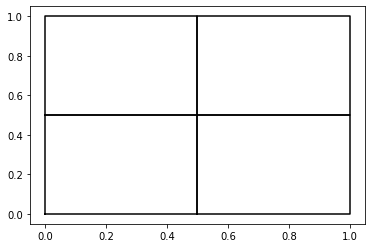

depth = 2


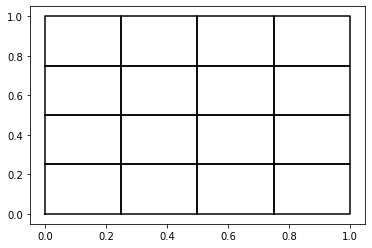

depth = 3


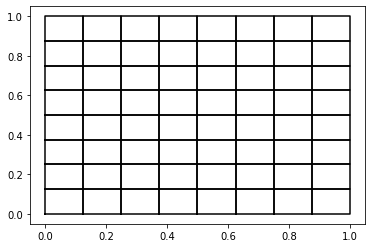

In [ ]:
#A Tree that redecomposes "depth" time each wavelet transform frequency panel 
print('depth = 1')
tree = Tree_Depth(depth=1,draw=True)
print('depth = 2')
tree = Tree_Depth(depth=2,draw=True)
print('depth = 3')
tree = Tree_Depth(depth=3,draw=True)

depth = 3


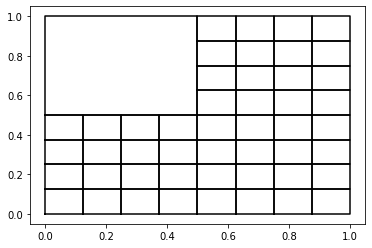

In [ ]:
#A tree that decompose the high frequency panels "depth" time, will letting the low frequency panel unchanged
print('depth = 3')
tree = Tree_Depth_High(depth=3,draw=True)

depth = 3


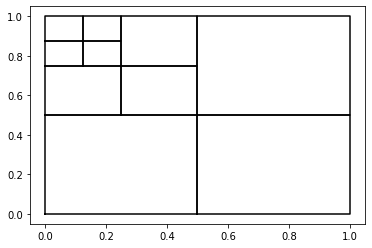

In [ ]:
#A tree that applies succesive fast wavelet transform , redecomposing only low frequencies, up to a certain depth
print('depth = 3')
Tree_Wav(depth=3,draw=True)

depth = 3
Q = 4


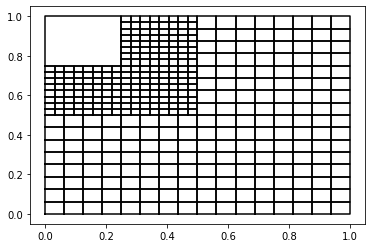

In [ ]:
#A tree that applies succesive fast wavelet transform , redecomposing only low frequencies, up to a certain depth
#Then each high frequency band is decomposed Q times, ie splitted into creating 2^Q octaves of same size
print('depth = 3')
print('Q = 4')
tree=Tree_WavOctaves(depth=3,Q=4,draw=True)